# Задача 1. Минимизация гладкой функции

Рассмотрим все ту же функцию из задания по линейной алгебре: $f(x) = sin(\frac{x}{5}) * e^{\frac{x}{10}} + 5 * e^{\frac{-x}{2}}$, но теперь уже на промежутке [1, 30]

В первом задании будем искать минимум этой функции на заданном промежутке с помощью *scipy.optimize*. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а $f(x)$ мы рассмотрим как удобный учебный пример.

Напишите на Питоне функцию, вычисляющую значение $f(x)$ по известному $x$. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

Изучите примеры использования *scipy.optimize.minimize* в документации Scipy (см. "Материалы")

Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения $x=2$. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - *ваш первый ответ по заданию 1*, его надо записать с точностью до 2 знака после запятой.

Теперь измените начальное приближение на x=30. Значение функции в точке минимума - *ваш второй ответ по заданию 1*, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division
from math import sin, exp

import numpy as np

from scipy.optimize import minimize
from matplotlib import pyplot as plt

In [3]:
def func(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

tm_vec = np.arange(1.0, 30.0, 0.1)

Выбираю "случайные начальные приближения (одна переменная т.к. функция одной переменно) и ищу минимум методом по умолчанию (Нелдер-Мида/Nelder-Mead)

In [4]:
min_res1 = minimize(func, np.array([func(1.0)]))

Только с начального приближения $x = 18.55$ метод начинает находить глобальный минимум вместо локального.

In [5]:
min_res2 = minimize(func, np.array([func(18.55)]))

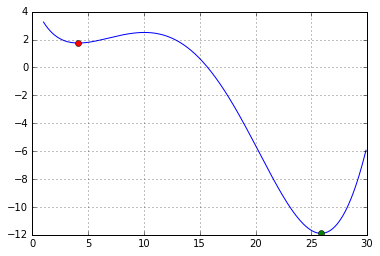

In [6]:
plt.grid(True)
plt.plot(tm_vec, [func(x) for x in tm_vec])
plt.plot(min_res1.x, np.array([func(x) for x in min_res1.x]), 'ro')
plt.plot(min_res2.x, np.array([func(x) for x in min_res2.x]), 'go')

Использую метод BFGS с начальным значением x=2

In [7]:
bfgs_res1 = minimize(func, np.array([2.0]), method='BFGS')

Использую BFGS для x=30

In [8]:
bfgs_res2 = minimize(func, np.array([30.0]), method='BFGS')

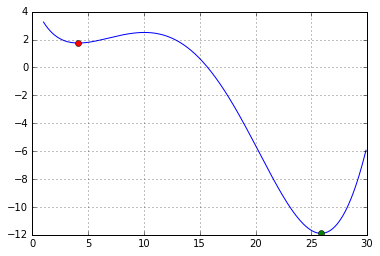

In [9]:
plt.grid(True)
plt.plot(tm_vec, [func(x) for x in tm_vec])
plt.plot(bfgs_res1.x, np.array([func(x) for x in bfgs_res1.x]), 'ro')
plt.plot(bfgs_res2.x, np.array([func(x) for x in bfgs_res2.x]), 'go')

Найденные минимумы различаются в зависимости от начальных приближений, т.к. градиентные методы не решают задачи глобальной оптимизации

In [10]:
print 'Results are %f and %f' % (bfgs_res1.x[0], bfgs_res2.x[0])

Results are 4.136276 and 25.880194


In [11]:
with open('submission-2-1.txt', 'w') as f:
    f.write('%0.2f %0.2f' % (func(bfgs_res1.x[0]), func(bfgs_res2.x[0])))

# Задача 2: глобальная оптимизация

Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.

Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. *Полученное значение функции в точке минимума - ответ в задаче 2*. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [12]:
from scipy.optimize import differential_evolution

In [13]:
def de_wrapper(x, *args):
    return func(x[0])

In [14]:
de_res1 = differential_evolution(de_wrapper, [(1.0, 30.0)])

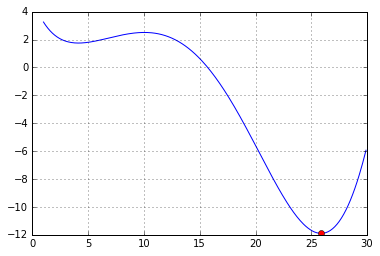

In [15]:
plt.grid(True)
plt.plot(tm_vec, [func(x) for x in tm_vec])
plt.plot(de_res1.x, np.array([func(x) for x in de_res1.x]), 'ro')

Сравнение количества операций и итераций для DiffEvol и BFGS методов

In [16]:
print 'Вызовов функции для BFGS %d а для Генетического алгоритма %d' % (bfgs_res2.nfev, de_res1.nfev)

Вызовов функции для BFGS 18 а для Генетического алгоритма 83


In [17]:
print 'Количество итераций для BFGS %d, а для Генетического алгоритма %d' % (bfgs_res2.nit, de_res1.nit)

Количество итераций для BFGS 5, а для Генетического алгоритма 4


In [18]:
with open('submission-2-2.txt', 'w') as f:
    f.write('%0.2f' % (func(de_res1.x[0]), ))

# Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию $ h(x) = int(f(x)) $ на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – *ваш первый ответ в этой задаче*.

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш *второй ответ в этом задании*. Запишите его через пробел после предыдущего.

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [19]:
def func2(x):
    return int(func(x))

def de_wrapper2(x):
    return func2(x[0])

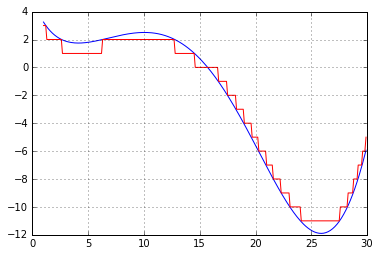

In [20]:
plt.grid(True)
plt.plot(tm_vec, [func(x) for x in tm_vec])
plt.plot(tm_vec, [func2(x) for x in tm_vec], '-r')

In [21]:
bfgs_res3 = minimize(func2, np.array([30.0]), method='BFGS')

In [22]:
de_res2 = differential_evolution(de_wrapper2, [(1.0, 30.0)])

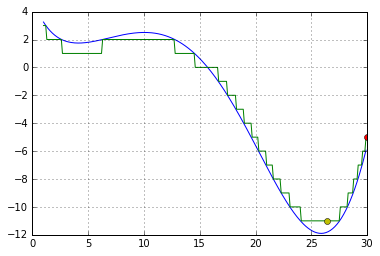

In [23]:
plt.grid(True)
plt.plot(tm_vec, [func(x) for x in tm_vec])
plt.plot(tm_vec, [func2(x) for x in tm_vec])
plt.plot([bfgs_res3.x[0]], [func2(bfgs_res3.x[0])], 'or')
plt.plot([de_res2.x[0]], [func2(de_res2.x[0])], 'oy')

In [24]:
with open('submission-2-3.txt', 'w') as f:
    f.write('%0.2f %0.2f' % (func2(bfgs_res3.x[0]), func2(de_res2.x[0])))

In [25]:
!pwd

/Users/zolkko/projects/yandex-ml/week3
